# <center><b>Precision - Recall Curves</b></center>

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


from sklearn.metrics import(
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
    auc
)

from yellowbrick.classifier import PrecisionRecallCurve

## Import Data

In [2]:
data = pd.read_csv("kdd2004.csv")

data["target"] = data["target"].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# Size of the dataset

data.shape

(145751, 75)

In [4]:
# imbalanced target

data["target"].value_counts(normalize = True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

### Train Test Split

In [5]:
# separate dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels = ["target"], axis = 1),
    data["target"],
    test_size = 0.3,
    random_state = 42
)
X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Model Building

### Random Forests Model

In [6]:
rf = RandomForestClassifier(
    n_estimators = 100, 
    random_state = 52, 
    max_depth = 2, 
    n_jobs = 6
    )

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:, 1]
y_test_rf = rf.predict_proba(X_test)[:, 1]

### Logistic Regression Model

In [7]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        random_state = 40, 
        max_iter= 10000
    )
)


pipe.fit(X_train, y_train)

y_train_logit = pipe.predict_proba(X_train)[:, 1]
y_test_logit = pipe.predict_proba(X_test)[:, 1]

## Precision - Recall Curve - Plot

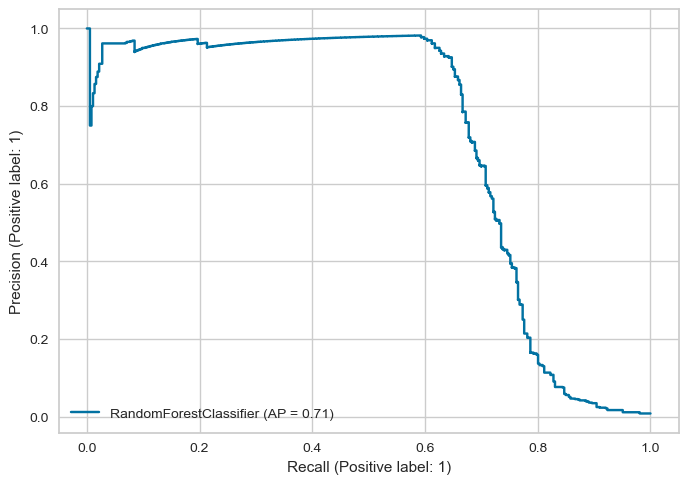

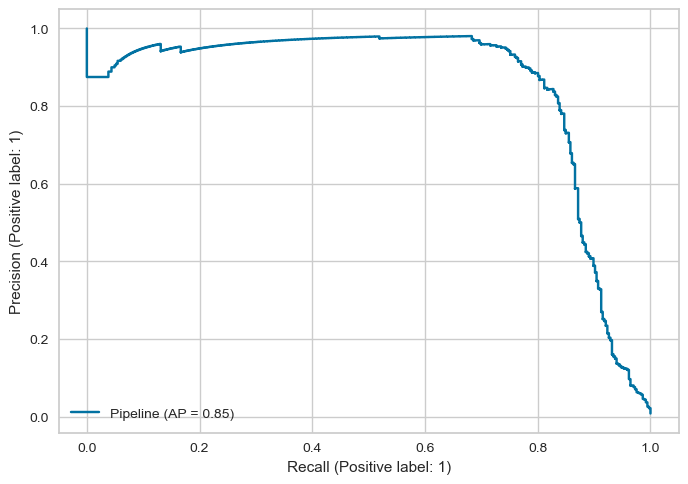

In [8]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test )
logist_disp = PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test)

<blockquote>The graphs are the output of the Precision Recall curve for the Models and displays the area under the Precision - Recall Curve.

<br>- The main idea is to make the curve as close to the right corner as possible.
<br>- The larger the area, the better the performance of the model.
</blockquote>

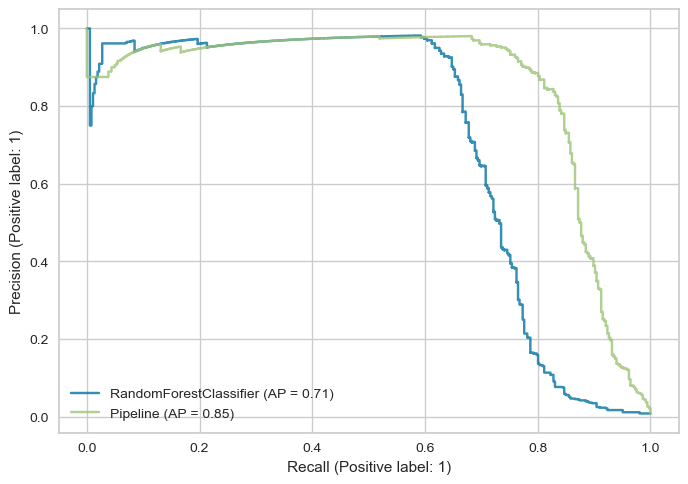

In [9]:
ax = plt.gca()
rf_disp.plot(ax = ax, alpha = 0.8)
logist_disp.plot(ax = ax, alpha = 0.8);

<blockquote>We can conclude that the Logistic Regression is performing better than the Random Forest Classifier. </blockquote>

In [10]:
# Random Forests Analysis

# Find precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_rf)

# Using these values to determine the area under the curve
auc_rf = auc(recall, precision)
print(f"Area under Precision-Recall Curve for Random Forest Classifier:\t\t{auc_rf}")

# Logistic Regression Analysis

# Find precision & recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_logit)

# Using the precision & recall values to determine the area under the curve
auc_logit = auc(recall, precision)
print(f"Area under Precision-Recall Curve for Logistic Regression:\t\t{auc_logit}")

Area under Precision-Recall Curve for Random Forest Classifier:		0.711914026303416
Area under Precision-Recall Curve for Logistic Regression:		0.8500170894685025


### Average Precision Score
<blockquote> This is another way of summarizing the Precision - Recall Curve.</blockquote>

In [11]:
# Random Forests Classifier
ap_rf = average_precision_score(y_test, y_test_rf)
print(f"Average Precision for Random Forest Classifier:\t\t{ap_rf} ")

# Logistic Regression
ap_logist = average_precision_score(y_test, y_test_logit)
print(f"Average Precision for Logistic Regression:\t\t{ap_logist}") 

Average Precision for Random Forest Classifier:		0.7125938645678662 
Average Precision for Logistic Regression:		0.8479336088305824


### Yellowbrick

c:\ProgramData\Anaconda3\envs\skorch-ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


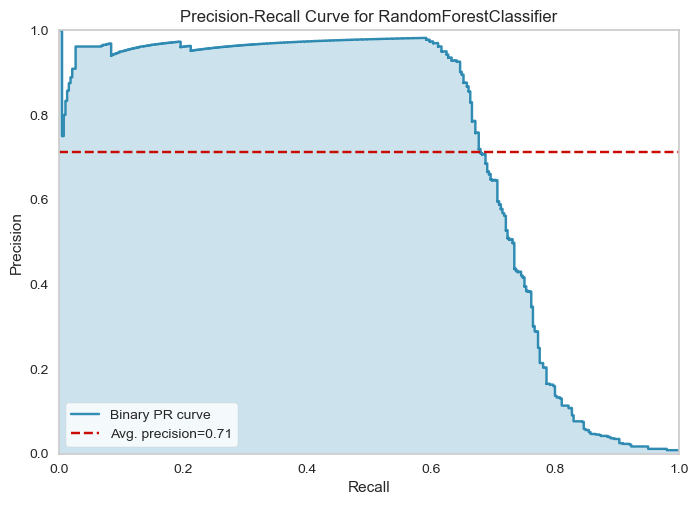

In [17]:
# Random Forest Visual 

visualizer = PrecisionRecallCurve(rf, classes = [0, 1])

# feature_names = X_train.columns.tolist()


visualizer.fit(X_train, y_train, ) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();               # Finalize and show the visual

c:\ProgramData\Anaconda3\envs\skorch-ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


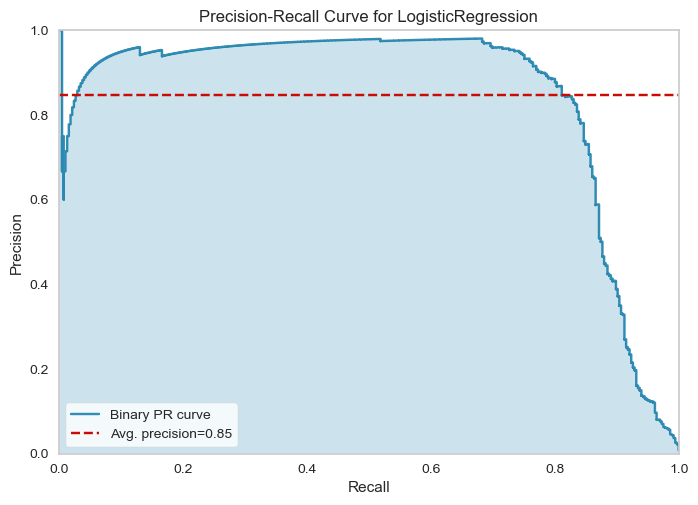

In [16]:
# Logistic Regression Visual

visualizer = PrecisionRecallCurve(pipe, classes = [0, 1])

visualizer.fit(X_train, y_train ) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();               # Finalize and show the visual